In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [72]:
df = pd.read_csv("profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [73]:
df.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [74]:
df['job']

0                           transportation
1                     hospitality / travel
2                                      NaN
3                                  student
4              artistic / musical / writer
5           computer / hardware / software
6                                      NaN
7              artistic / musical / writer
8                                      NaN
9                                  student
10                                     NaN
11       banking / financial / real estate
12                   entertainment / media
13             sales / marketing / biz dev
14                                   other
15                       medicine / health
16                   entertainment / media
17       banking / financial / real estate
18                       medicine / health
19            science / tech / engineering
20             sales / marketing / biz dev
21                                 student
22                  executive / management
23         

#### feature engineering


`age`

In [75]:
df['age'].describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

In [76]:
#not used as there are too many categorical variables now
#df['midages'] = np.where((df['age']<=37) & (df['age']>=26) , 1, 0)

`bodytype`

In [77]:
df['body_type'].value_counts()

def bodytype(df):
    if df['body_type'] in ['average', 'fit']:
        return 1
    else:
        return 0
    
df['fitness'] = df.apply(bodytype, axis=1)

`diet`

In [78]:
df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [79]:
df['vegetarian'] = np.where(df['diet'].str.contains('vegetarian'), 1, 0)

`status`

single vs. available:

https://www.reddit.com/r/OkCupid/comments/ldce5/when_did_this_happen_available_vs_single/

In [80]:
df['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

In [81]:
df['single'] = np.where(df['status']=='single', 1, 0)

`drinks`

In [82]:
df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [83]:
df['socialdrinkers'] = np.where(df['drinks']=='socially', 1, 0)

`drugs`

In [84]:
df['drugs'].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [85]:
df['neverdrugs'] = np.where(df['drugs']=='never', 1, 0)

`education`

In [86]:
df['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [87]:
df['stillstudents'] = np.where(df['education'].str.contains('working on'), 1, 0)

`ethnicity`

In [88]:
df['ethnicity'].value_counts().head()

white               32831
asian                6134
hispanic / latin     2823
black                2008
other                1706
Name: ethnicity, dtype: int64

In [89]:
df['white'] = np.where(df['ethnicity']=='white', 1, 0)

`height`

In [90]:
df['height'].value_counts().head()

70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
Name: height, dtype: int64

In [91]:
df['normalheight'] = np.where((df['height']<=72) & (df['height']>=67) , 1, 0)

`income`

In [92]:
df['income'].value_counts().head()

-1         48442
 20000      2952
 100000     1621
 80000      1111
 30000      1048
Name: income, dtype: int64

In [93]:
df['missincome'] = np.where(df['income']==-1 , 1, 0)

`job`

In [94]:
df['job'].value_counts().head()

other                             7589
student                           4882
science / tech / engineering      4848
computer / hardware / software    4709
artistic / musical / writer       4439
Name: job, dtype: int64

`location`

not used; use distance from SF instead

In [95]:
#df['SFlocal'] = np.where(df['location']=='san francisco, california', 1, 0)

`offspring`

In [96]:
df['offspring'].value_counts()

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64

In [97]:
df['nokids'] = np.where(df['offspring'].str.contains('doesn&rsquo;t have kids'), 1, 0)

`orientation`

In [98]:
df['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

In [99]:
df['straight'] = np.where(df['orientation']=='straight', 1, 0)

`pets`

In [100]:
df['pets'].value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [101]:
df['haspets'] = np.where(df['pets'].str.contains('has'), 1, 0)

`religion`

In [102]:
df['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

In [103]:
df['nonreligious'] = np.where(pd.isnull(df['religion']), 1, 0)

`sex`

In [104]:
df['male'] = np.where(df['sex']=='m', 1, 0)

`smokes`

In [105]:
df['smokes'].value_counts()

no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [106]:
df['nosmoke'] = np.where(df['smokes']=='no', 1, 0)

`speaks`

In [107]:
df['speaks'].value_counts().head()

english                                   21828
english (fluently)                         6628
english (fluently), spanish (poorly)       2059
english (fluently), spanish (okay)         1917
english (fluently), spanish (fluently)     1288
Name: speaks, dtype: int64

In [108]:
def numlanguages(df):
    
    try:
        return len(df['speaks'].split(','))
    
    except AttributeError:
        return 1
        

df['languages'] = df.apply(numlanguages, axis=1)

`distance` and `days_since_online` from Adam's cleaned data

In [119]:
demo = df[df.columns[-16:]]

In [120]:
df2 = pd.read_csv("full_ok_cupid_cleaned/full_ok_cupid_cleaned.csv")

In [121]:
df2 = df2[['distance', 'days_since_online']].round(0)

In [122]:
demo = pd.concat([demo, df2], axis=1)

In [129]:
demo['age'] =df['age']

#### Examine new features

In [130]:
demo.isnull().sum()

fitness              0
vegetarian           0
single               0
socialdrinkers       0
neverdrugs           0
stillstudents        0
white                0
normalheight         0
missincome           0
nokids               0
straight             0
haspets              0
nonreligious         0
male                 0
nosmoke              0
languages            0
distance             0
days_since_online    0
age                  0
dtype: int64

In [131]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 19 columns):
fitness              59946 non-null int64
vegetarian           59946 non-null int32
single               59946 non-null int32
socialdrinkers       59946 non-null int32
neverdrugs           59946 non-null int32
stillstudents        59946 non-null int32
white                59946 non-null int32
normalheight         59946 non-null int32
missincome           59946 non-null int32
nokids               59946 non-null int32
straight             59946 non-null int32
haspets              59946 non-null int32
nonreligious         59946 non-null int32
male                 59946 non-null int32
nosmoke              59946 non-null int32
languages            59946 non-null int64
distance             59946 non-null float64
days_since_online    59946 non-null float64
age                  59946 non-null int64
dtypes: float64(2), int32(14), int64(3)
memory usage: 5.5 MB


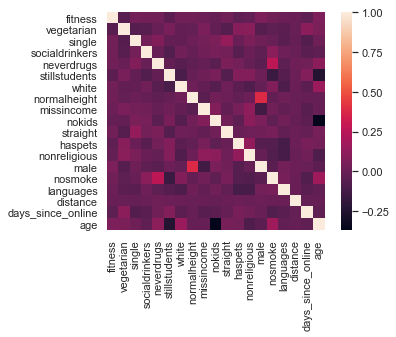

In [136]:
#no strong correlation among variables
sns.heatmap(demo.corr(), square = True)

In [132]:
demo.head()

,fitness,vegetarian,single,socialdrinkers,neverdrugs,stillstudents,white,normalheight,missincome,nokids,straight,haspets,nonreligious,male,nosmoke,languages,distance,days_since_online,age
0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,8.0,3.0,22
1,1,0,1,0,0,1,1,1,0,1,1,0,0,1,1,3,8.0,1.0,35
2,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,3,0.0,4.0,38
3,0,1,1,1,0,1,1,1,0,0,1,0,1,1,1,2,10.0,3.0,23
4,0,1,1,1,1,0,0,0,1,1,1,0,1,1,1,1,0.0,3.0,29


In [133]:
demo.describe()

,fitness,vegetarian,single,socialdrinkers,neverdrugs,stillstudents,white,normalheight,missincome,nokids,straight,haspets,nonreligious,male,nosmoke,languages,distance,days_since_online,age
count,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000,59946.000000
mean,0.456461,0.490124,0.929120,0.696961,0.629300,0.285140,0.547676,0.537100,0.808094,0.862326,0.860875,0.570747,0.337404,0.597688,0.732259,1.850666,10.386948,40.097121,32.340290
std,0.498105,0.499907,0.256627,0.459576,0.482996,0.451485,0.497726,0.498626,0.393803,0.344560,0.346080,0.494974,0.472828,0.490368,0.442786,1.036728,104.382995,77.282537,9.452779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,4.000000,30.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,10.000000,33.000000,37.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,7643.000000,370.000000,110.000000


#### Clustering

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [186]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


#using MinMaxScaler as the feature matrix has both binary and continuous features
from sklearn.preprocessing import MinMaxScaler


In [180]:
mms = MinMaxScaler()
mms.fit(demo)
demo_transformed = mms.transform(demo)

C:\Users\lliu9\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [188]:
Sum_of_squared_distances = []
sil = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k).fit(demo_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    sil.append(silhouette_score(demo_transformed, kmeans.labels_, metric = 'euclidean'))

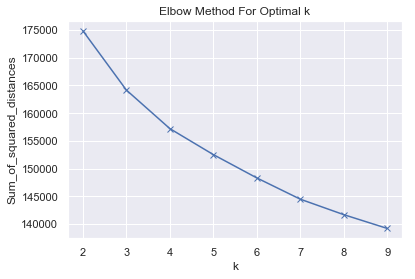

<Figure size 432x288 with 0 Axes>

In [192]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
plt.savefig('SSD')

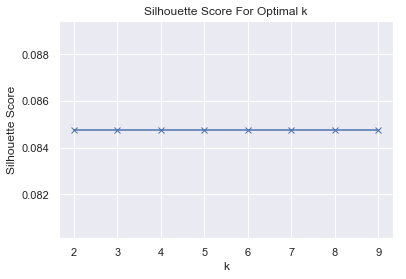

In [191]:
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

In [197]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(demo_transformed)
y_kmeans = kmeans.predict(demo_transformed)

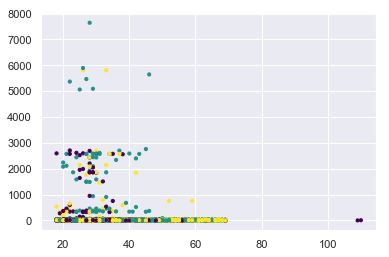

In [202]:
plt.scatter(demo.age, demo.distance, c=y_kmeans, s=10, cmap='viridis')
centers = kmeans.cluster_centers_

In [199]:
demo['centers'] = y_kmeans
demo.groupby('centers').mean()

,fitness,vegetarian,single,socialdrinkers,neverdrugs,stillstudents,white,normalheight,missincome,nokids,straight,haspets,nonreligious,male,nosmoke,languages,distance,days_since_online,age
centers,,,,,,,,,,,,,,,,,,,
0,0.423505,0.528789,0.920971,0.598408,0.371389,0.427190,0.470356,0.570376,0.796078,0.901494,0.822926,0.634204,0.416595,0.660262,0.010660,1.768968,9.895703,50.994341,29.155689
1,0.490529,0.450440,0.927141,0.717783,0.694542,0.243134,0.567998,0.700856,0.766433,0.870318,0.865244,0.516326,0.305419,0.998373,0.990743,1.924236,11.508308,35.684936,32.950304
2,0.436457,0.513205,0.938358,0.747676,0.747359,0.228396,0.582030,0.287080,0.874551,0.819987,0.885379,0.594021,0.317452,0.001056,0.959011,1.815920,9.252113,37.366522,34.064758


3 clusters:
    
    1. Smokers, do more drugs and frinks, more students ratio, mostly has no kids, not seriously with religions, longest days online
    2. Straight Male, soem don't live in DF, normal height, don't smoke
    3. Straight Female, around 34 yrs old, mostly not students, might ne too short or too high, don't smoke